In [1]:
import openpathsampling as paths
from openpathsampling.visualize import PathTreeBuilder
from IPython.display import SVG

In [2]:
st = paths.storage.Storage('toy_retis.nc', mode='r')

In [3]:
psi = st.cvs[0]
print psi.name
print [ cv.name for cv in st.cvs ]

xval
[u'xval']


In [10]:
retis = st.transitions[0]

In [41]:
tree = PathTreeBuilder(st)
tree.rejected = True
tree.states = { 'blue' : retis.stateA }

for no, interface in enumerate(retis.interfaces):
    tree.states['rgb(' + str(no*60) + ',0,0)'] =  interface

tree.op = lambda snap : 'B' if snap.reversed else 'F'
tree.op = lambda snap : snap.configuration.idx[st]
tree.from_samples(tree.construct_heritage(st, st.samples[100]))

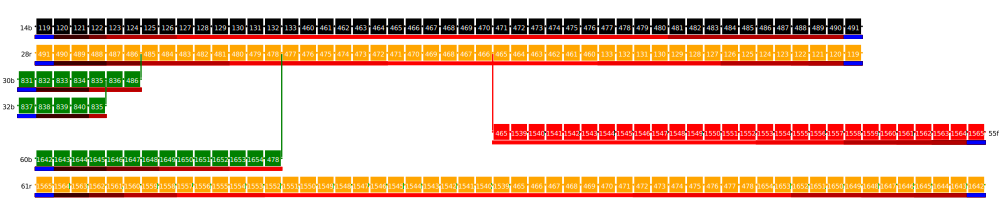

In [42]:
view = tree.renderer
view.zoom = 1.1
view.scale_y = 24
view.scale_x = 16
view.font_size = 0.25
SVG(view.to_svg())

In [6]:
st.samples.count()

134

In [7]:
samps = []
for sampset in st.samplesets:
    samps.extend([sa for sa in sampset if sa.replica == 1])